In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def get_equalization_map_inverse(total_pixels,frequency_distribution,l):
    cumulative=[0]*l
    cumulative[0]=frequency_distribution[0]
    for i in range(1,l):
        cumulative[i]=frequency_distribution[i]+cumulative[i-1]
    equalization_map=[0]*l
    
    for i in range(l):
        equalization_map[i]=int(cumulative[i]*(l-1)/total_pixels)

    equalization_map_inverse=[0]*l
    
    for i in range(l):
        equalization_map_inverse[equalization_map[i]]=i
    # for i in range(len(equalization_map)):
    #     print(i," - ",frequency_distribution[i]," - ",cumulative[i]," - ",equalization_map[i],"\n")
    
    return equalization_map_inverse


In [22]:
def get_image_linear(name,l):
    img=Image.open(name)
    width , height =img.size
    pixels=img.load()
    total_pixels=width*height
    linear=list(img.getdata())
#     img_matrix=[]
#     for w in range(width):
#         temp_array=[]
#         for h in range(height):
#             p=img.getpixel((w,h))
#             temp_array+=[p]
#         img_matrix+=[temp_array]
#     return linear , img_matrix
    return linear


In [23]:
def get_frequency_distribution(img_linear,l):
    distribution=[0]*l
    for pixel in img_linear:
        distribution[pixel]+=1
    return distribution

In [24]:
def create_image(equalization_map,name,final_name):
    img = Image.open(name)
    width, height = img.size
    pixels = img.load()
    for w in range(width):
        for h in range(height):
            #retrieve the pixel value
            p = img.getpixel((w,h))
            
            pixels[w,h] = (equalization_map[p])
    img.show()
    img.save(final_name)


In [25]:
def get_closest_index(arr,n):
    closest_index=0
    diff=abs(arr[closest_index]-n)
    
    for index in range(len(arr)):
        if(abs(arr[index]-n)<diff):
            diff=abs(arr[index]-n)
            closest_index=index
    return closest_index

In [26]:
def get_matching_map(inverse_map_source,inverse_map_target,l):
    matching_map=[0]*l
    for i in range(l):
        matching_map[inverse_map_source[i]]=inverse_map_target[i]
    
    return matching_map


In [27]:
def match(matching_map,img_linear,frequency_distribution,l) : 
    total_pixels=len(img_linear)
    new_img_linear=[0]*total_pixels
    new_frequency_distribution=[0]*l
    for i in range(l):
        new_frequency_distribution[matching_map[i]]=frequency_distribution[i]
        
    for i in range(total_pixels):
        new_img_linear[i]=matching_map[img_linear[i]]
    
       

    return img_linear,new_frequency_distribution


In [35]:
def plot_bar(distribution,name):
    index = np.arange(0,256)
    plt.bar(index, distribution )
    plt.xlabel('Intensity Level')
    plt.ylabel('Frequency')
    fig = plt.gcf()
    print(name)
    plt.show()
    fig.savefig(name)

In [36]:
def create_image(equalization_map,name,final_name):
    img = Image.open(name)
    width, height = img.size
    pixels = img.load()
    for w in range(width):
        for h in range(height):
            #retrieve the pixel value
            p = img.getpixel((w,h))
            
            pixels[w,h] = (equalization_map[p])
  
    img.show()
    img.save(final_name)

In [37]:
def main():
    location="SampleImages/"
    name_source="dark.jpg"
    name_target="rose_gray.jpg"
    l=256
    
    img_linear_source= get_image_linear(location+name_source,l)
    img_linear_target= get_image_linear(location+name_target,l)
    
    total_pixels_source=len(img_linear_source)
    total_pixels_target=len(img_linear_target)
#     print("total pixels",total_pixels,"\n")

    frequency_distribution_source=get_frequency_distribution(img_linear_source,l)
    frequency_distribution_target=get_frequency_distribution(img_linear_target,l)
    
    equalization_map_inverse_source=get_equalization_map_inverse(total_pixels_source,frequency_distribution_source,l)
    equalization_map_inverse_target=get_equalization_map_inverse(total_pixels_target,frequency_distribution_target,l)
    
    matching_map=get_matching_map(equalization_map_inverse_source,equalization_map_inverse_target,l)
    
    new_img_linear,new_frequency_distribution=match(matching_map,img_linear_source,frequency_distribution_source,l)
    
    
    plot_bar(frequency_distribution_target,name_target+"_target.png")
    plot_bar(frequency_distribution_source,name_source+"_before_matching_source.png")
    plot_bar(new_frequency_distribution,name_source+"_after_matching_source.png")
    
    create_image(matching_map,location+name_source,location+"new_matched_"+name_source)
   
    
    

rose_gray.jpg_target.png


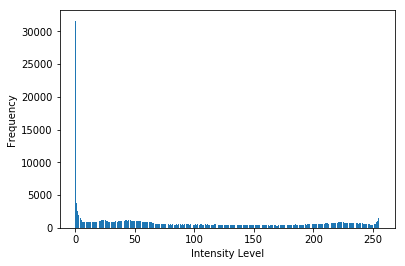

dark.jpg_before_matching_source.png


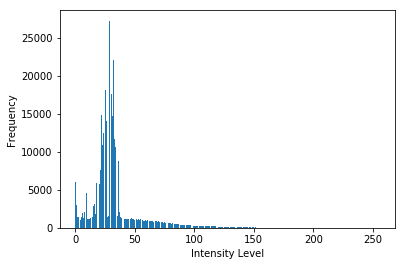

dark.jpg_after_matching_source.png


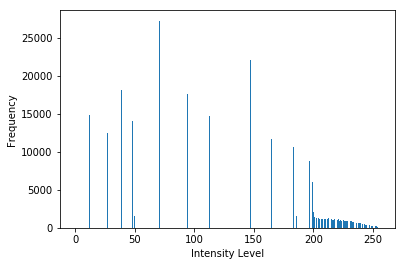

In [38]:
main()